In [2]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from encoding_information.information_estimation import *
from encoding_information.image_utils import *
from encoding_information.models.gaussian_process import StationaryGaussianProcess

from encoding_information.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM
Opened BSCCM


In [3]:
edge_crop = 32
patch_size = 10

num_images = 5000
num_patches = 5000
num_test_images = 500
num_test_patches = 500

channel = 'LED119'
confidence_interval = 90
num_bootstrap_samples = 50

all_images = load_bsccm_images(bsccm, channel, num_images=num_images + num_test_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=True)
images = all_images[:num_images]
test_images = all_images[num_images:]
patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches)
test_patches = extract_patches(test_images, patch_size=patch_size, num_patches=num_test_patches)


Computing loss: 9it [00:02,  3.46it/s]


Initial validation NLL: 1.50


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]
Computing loss: 9it [00:00, 63.20it/s]


Epoch 1: validation NLL: 1.50


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 32.30it/s]
Computing loss: 9it [00:00, 62.86it/s]


Epoch 2: validation NLL: 1.50


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 29.64it/s]
Computing loss: 9it [00:00, 67.14it/s]


Epoch 3: validation NLL: 1.50


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
Computing loss: 9it [00:00, 64.34it/s]


Epoch 4: validation NLL: 1.50


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 25.72it/s]
Computing loss: 9it [00:00, 58.87it/s]


Epoch 5: validation NLL: 1.50


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 24.00it/s]
Computing loss: 9it [00:00, 54.91it/s]


Epoch 6: validation NLL: 1.50


Epoch 7: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
Computing loss: 9it [00:00, 62.49it/s]


Epoch 7: validation NLL: 1.50


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 24.57it/s]
Computing loss: 9it [00:00, 54.24it/s]


Epoch 8: validation NLL: 1.49


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 20.04it/s]
Computing loss: 9it [00:00, 44.85it/s]


Epoch 9: validation NLL: 1.51


Epoch 10: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]
Computing loss: 9it [00:00, 74.86it/s]


Epoch 10: validation NLL: 1.50


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 15.31it/s]
Computing loss: 9it [00:00, 54.91it/s]


Epoch 11: validation NLL: 18378.64


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 23.85it/s]
Computing loss: 9it [00:00, 71.43it/s]


Epoch 12: validation NLL: nan


Epoch 13: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
Computing loss: 9it [00:00, 51.92it/s]


Epoch 13: validation NLL: nan


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 23.24it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 95.38it/s]
Computing loss: 9it [00:02,  3.42it/s].98s/it]


Initial validation NLL: 1.83


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.55s/it]
Computing loss: 9it [00:00, 82.24it/s]


Epoch 1: validation NLL: 1.82


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
Computing loss: 9it [00:00, 81.58it/s]


Epoch 2: validation NLL: 1.83


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 49.24it/s]
Computing loss: 9it [00:00, 76.09it/s]


Epoch 3: validation NLL: 1.82


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 26.31it/s]
Computing loss: 9it [00:00, 53.80it/s]


Epoch 4: validation NLL: 1.83


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
Computing loss: 9it [00:00, 57.94it/s]


Epoch 5: validation NLL: 1.82


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 30.56it/s]
Computing loss: 9it [00:00, 65.28it/s]


Epoch 6: validation NLL: 1.82


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 60.42it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 49.72it/s]
Computing loss: 9it [00:02,  3.38it/s].13s/it]


Initial validation NLL: 2.03


Epoch 1: 100%|██████████| 1/1 [00:10<00:00, 10.15s/it]
Computing loss: 9it [00:00, 61.06it/s]


Epoch 1: validation NLL: 2.02


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 20.71it/s]
Computing loss: 9it [00:00, 63.26it/s]


Epoch 2: validation NLL: 2.02


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 34.04it/s]
Computing loss: 9it [00:00, 66.60it/s]


Epoch 3: validation NLL: 2.03


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]
Computing loss: 9it [00:00, 62.18it/s]


Epoch 4: validation NLL: 2.03


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 32.61it/s]
Computing loss: 9it [00:00, 58.38it/s]


Epoch 5: validation NLL: 2.03


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 40.34it/s]
Computing loss: 9it [00:00, 55.84it/s]


Epoch 6: validation NLL: 2.02


Epoch 7: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]
Computing loss: 9it [00:00, 60.07it/s]


Epoch 7: validation NLL: 2.03


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]
Computing loss: 9it [00:00, 49.07it/s]


Epoch 8: validation NLL: 2.02


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 31.57it/s]
Computing loss: 9it [00:00, 69.48it/s]


Epoch 9: validation NLL: 2.03


Epoch 10: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
Computing loss: 9it [00:00, 62.12it/s]


Epoch 10: validation NLL: 2.02


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 41.56it/s]
Computing loss: 9it [00:00, 60.30it/s]


Epoch 11: validation NLL: 2.03


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 37.49it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 100.35it/s]
Computing loss: 9it [00:02,  3.94it/s].34s/it]


Initial validation NLL: 2.18


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.80s/it]
Computing loss: 9it [00:00, 48.80it/s]


Epoch 1: validation NLL: 2.17


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 23.20it/s]
Computing loss: 9it [00:00, 51.40it/s]


Epoch 2: validation NLL: 2.17


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 24.65it/s]
Computing loss: 9it [00:00, 23.70it/s]


Epoch 3: validation NLL: 2.17


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 26.17it/s]
Computing loss: 9it [00:00, 55.48it/s]


Epoch 4: validation NLL: 2.17


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 25.08it/s]
Computing loss: 9it [00:00, 47.11it/s]


Epoch 5: validation NLL: 2.18


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]
Computing loss: 9it [00:00, 53.18it/s]


Epoch 6: validation NLL: 2.17


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 25.61it/s]
Computing loss: 9it [00:00, 53.16it/s]


Epoch 7: validation NLL: 2.16


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]
Computing loss: 9it [00:00, 57.00it/s]


Epoch 8: validation NLL: 2.17


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 23.94it/s]
Computing loss: 9it [00:00, 52.92it/s]


Epoch 9: validation NLL: 2.18


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 25.84it/s]
Computing loss: 9it [00:00, 55.44it/s]


Epoch 10: validation NLL: 2.17


Epoch 11: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
Computing loss: 9it [00:00, 51.50it/s]


Epoch 11: validation NLL: 2.18


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 26.97it/s]
Computing loss: 9it [00:00, 56.32it/s]


Epoch 12: validation NLL: 2.18


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 56.58it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 62.94it/s]
Computing loss: 9it [00:02,  3.35it/s].55s/it]


Initial validation NLL: 2.28


Epoch 1: 100%|██████████| 1/1 [00:09<00:00,  9.24s/it]
Computing loss: 9it [00:00, 78.75it/s]


Epoch 1: validation NLL: 2.29


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 42.34it/s]
Computing loss: 9it [00:00, 37.57it/s]


Epoch 2: validation NLL: 2.28


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]
Computing loss: 9it [00:00, 89.31it/s]


Epoch 3: validation NLL: 2.27


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 48.09it/s]
Computing loss: 9it [00:00, 56.18it/s]


Epoch 4: validation NLL: 2.28


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 27.80it/s]
Computing loss: 9it [00:00, 93.98it/s]


Epoch 5: validation NLL: 2.28


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]
Computing loss: 9it [00:00, 43.78it/s]


Epoch 6: validation NLL: 2.28


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 54.99it/s]
Computing loss: 9it [00:00, 83.22it/s]

Epoch 7: validation NLL: 2.28

Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 40.06it/s]
Computing loss: 9it [00:00, 96.61it/s]


Epoch 8: validation NLL: 2.28


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 50.64it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 77.96it/s]
Computing loss: 9it [00:02,  3.67it/s].15s/it]


Initial validation NLL: 2.67


Epoch 1: 100%|██████████| 1/1 [00:07<00:00,  7.81s/it]
Computing loss: 9it [00:00, 99.75it/s]


Epoch 1: validation NLL: 2.66


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 43.80it/s]
Computing loss: 9it [00:00, 107.37it/s]


Epoch 2: validation NLL: 2.66


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 53.69it/s]
Computing loss: 9it [00:00, 107.30it/s]


Epoch 3: validation NLL: 2.66


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 55.50it/s]
Computing loss: 9it [00:00, 93.47it/s]


Epoch 4: validation NLL: 2.66


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]
Computing loss: 9it [00:00, 94.77it/s]


Epoch 5: validation NLL: 2.66


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 48.33it/s]
Computing loss: 9it [00:00, 109.54it/s]


Epoch 6: validation NLL: 2.66


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 79.63it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 46.86it/s]
Computing loss: 9it [00:02,  3.69it/s].58s/it]


Initial validation NLL: 3.03


Epoch 1: 100%|██████████| 1/1 [00:09<00:00,  9.01s/it]
Computing loss: 9it [00:00, 92.75it/s]


Epoch 1: validation NLL: 3.04


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 42.63it/s]
Computing loss: 9it [00:00, 114.72it/s]


Epoch 2: validation NLL: 3.04


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 56.91it/s]
Computing loss: 9it [00:00, 107.91it/s]


Epoch 3: validation NLL: 3.04


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 58.37it/s]
Computing loss: 9it [00:00, 90.29it/s]


Epoch 4: validation NLL: 3.04


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 39.90it/s]
Computing loss: 9it [00:00, 101.78it/s]


Epoch 5: validation NLL: 3.04


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 90.56it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 86.62it/s]
Computing loss: 9it [00:02,  3.56it/s].17s/it]


Initial validation NLL: 3.59


Epoch 1: 100%|██████████| 1/1 [00:09<00:00,  9.38s/it]
Computing loss: 9it [00:00, 98.58it/s]


Epoch 1: validation NLL: 3.58


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 42.55it/s]
Computing loss: 9it [00:00, 95.25it/s]


Epoch 2: validation NLL: 3.59


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 55.27it/s]
Computing loss: 9it [00:00, 103.29it/s]


Epoch 3: validation NLL: 3.58


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 57.51it/s]
Computing loss: 9it [00:00, 108.87it/s]


Epoch 4: validation NLL: 3.58


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 50.11it/s]
Computing loss: 9it [00:00, 103.07it/s]


Epoch 5: validation NLL: 3.57


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
Computing loss: 9it [00:00, 112.07it/s]


Epoch 6: validation NLL: 3.59


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 54.83it/s]
Computing loss: 9it [00:00, 104.63it/s]


Epoch 7: validation NLL: 3.58


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 55.08it/s]
Computing loss: 9it [00:00, 97.37it/s]


Epoch 8: validation NLL: 3.60


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 60.07it/s]
Computing loss: 9it [00:00, 107.46it/s]


Epoch 9: validation NLL: 3.58


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 36.16it/s]
Computing loss: 9it [00:00, 100.03it/s]


Epoch 10: validation NLL: 3.59


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 63.55it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 66.82it/s]
Computing loss: 9it [00:02,  3.66it/s].78s/it]


Initial validation NLL: 3.99


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.95s/it]
Computing loss: 9it [00:00, 89.70it/s]


Epoch 1: validation NLL: 4.01


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 46.89it/s]
Computing loss: 9it [00:00, 79.54it/s]


Epoch 2: validation NLL: 4.01


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]
Computing loss: 9it [00:00, 81.48it/s]


Epoch 3: validation NLL: 4.00


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 56.31it/s]
Computing loss: 9it [00:00, 75.40it/s]


Epoch 4: validation NLL: 4.00


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 55.99it/s]
Computing loss: 9it [00:00, 76.31it/s]


Epoch 5: validation NLL: 4.00


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 48.53it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 49.78it/s]
Computing loss: 9it [00:03,  2.67it/s].32s/it]


Initial validation NLL: 4.73


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.93s/it]
Computing loss: 9it [00:00, 95.57it/s]


Epoch 1: validation NLL: 4.74


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 43.95it/s]
Computing loss: 9it [00:00, 100.02it/s]


Epoch 2: validation NLL: 4.74


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 50.76it/s]
Computing loss: 9it [00:00, 25.25it/s]


Epoch 3: validation NLL: 4.72


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 57.19it/s]
Computing loss: 9it [00:00, 113.95it/s]


Epoch 4: validation NLL: 4.72


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 61.18it/s]
Computing loss: 9it [00:00, 114.00it/s]


Epoch 5: validation NLL: 4.72


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 59.82it/s]
Computing loss: 9it [00:00, 99.63it/s]


Epoch 6: validation NLL: 4.73


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 57.86it/s]
Computing loss: 9it [00:00, 117.34it/s]


Epoch 7: validation NLL: 4.74


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 60.82it/s]
Computing loss: 9it [00:00, 103.03it/s]


Epoch 8: validation NLL: 4.74


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]
Computing loss: 9it [00:00, 119.22it/s]


Epoch 9: validation NLL: 4.73


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 52.87it/s]
Computing loss: 9it [00:00, 107.26it/s]


Epoch 10: validation NLL: 4.71


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 61.62it/s]
Computing loss: 9it [00:00, 105.28it/s]


Epoch 11: validation NLL: 4.73


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 46.00it/s]
Computing loss: 9it [00:00, 113.99it/s]


Epoch 12: validation NLL: 4.71


Epoch 13: 100%|██████████| 1/1 [00:00<00:00, 55.40it/s]
Computing loss: 9it [00:00, 99.66it/s]


Epoch 13: validation NLL: 4.73


Epoch 14: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]
Computing loss: 9it [00:00, 112.80it/s]


Epoch 14: validation NLL: 4.73


Epoch 15: 100%|██████████| 1/1 [00:00<00:00, 51.30it/s]
Computing loss: 9it [00:00, 108.46it/s]


Epoch 15: validation NLL: 4.72


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 75.50it/s]


evaluating likelihood


100%|██████████| 10/10 [04:59<00:00, 29.98s/it]


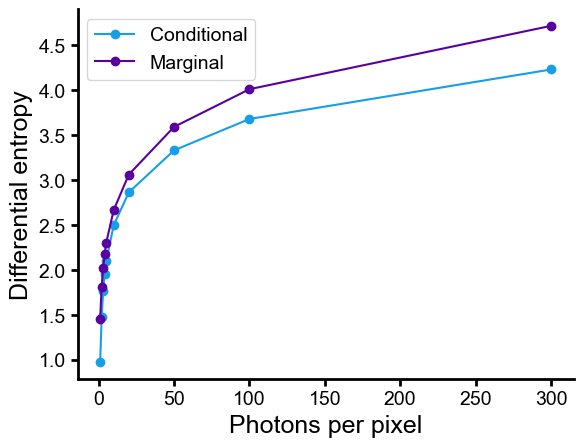

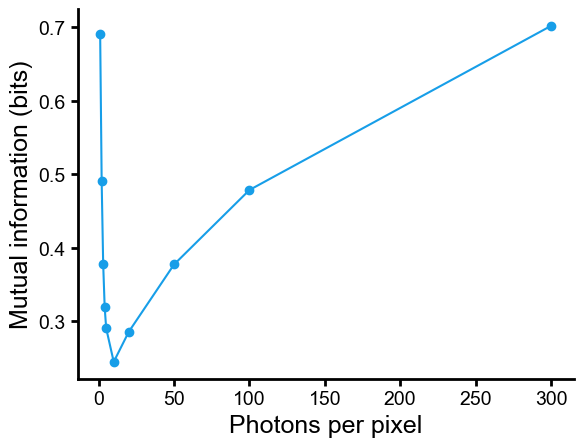

: 

In [21]:
# photons_per_pixel_values = [0.01, 0.1, 0.5, 1, 2, 4, 10, 50]
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
# photons_per_pixel_values = [10, 20, 50 , 100, 300]
eigenvalue_floor = 1e-8


conditionals = []
marginals = []
mi = []
for photons_per_pixel in tqdm(photons_per_pixel_values):
    noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images), seed=123)
    noisy_test_patches = add_noise(test_patches * photons_per_pixel / np.mean(images), seed=123)
    h_y_given_x = estimate_conditional_entropy(noisy_patches) 
    gp = StationaryGaussianProcess(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    gp.fit(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    h_y_gaussian = gp.compute_negative_log_likelihood(noisy_test_patches)
    conditionals.append(h_y_given_x)
    marginals.append(h_y_gaussian)
    mi.append( (h_y_gaussian - h_y_given_x) / np.log(2))

# plot both
fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, conditionals, '-o', label='Conditional')
ax.plot(photons_per_pixel_values, marginals, '-o', label='Marginal')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Differential entropy')
ax.legend()
clear_spines(ax)

fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
clear_spines(ax)

## Does PixelCNN rescue it?

In [4]:
from encoding_information.models.pixel_cnn  import PixelCNN

# photons_per_pixel_values = [0.01, 0.1, 0.5, 1, 2, 4, 10, 50]
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
# photons_per_pixel_values = [10, 20, 50 , 100, 300]
eigenvalue_floor = 1e-3


conditionals = []
marginals = []
mi = []
for photons_per_pixel in tqdm(photons_per_pixel_values):
    noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images), seed=123)
    noisy_test_patches = add_noise(test_patches * photons_per_pixel / np.mean(images), seed=123)
    h_y_given_x = estimate_conditional_entropy(noisy_patches) 
    pcnn = PixelCNN(num_mixture_components=100)
    pcnn.fit(noisy_patches, sigma_min=1e-1)
    h_y_gaussian = pcnn.compute_negative_log_likelihood(noisy_test_patches)
    conditionals.append(h_y_given_x)
    marginals.append(h_y_gaussian)
    mi.append( (h_y_gaussian - h_y_given_x) / np.log(2))



  0%|          | 0/10 [00:00<?, ?it/s]2023-10-25 20:46:28.503724: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Computing loss: 16it [00:12,  1.28it/s]


Initial validation NLL: 2.30


Epoch 1: 100%|██████████| 100/100 [00:20<00:00,  4.98it/s]
Computing loss: 16it [00:00, 86.93it/s]


Epoch 1: validation NLL: 1.44


Epoch 2: 100%|██████████| 100/100 [00:02<00:00, 43.60it/s]
Computing loss: 16it [00:00, 88.60it/s]


Epoch 2: validation NLL: 1.43


Epoch 3: 100%|██████████| 100/100 [00:02<00:00, 47.26it/s]
Computing loss: 16it [00:00, 31.81it/s]


Epoch 3: validation NLL: 1.34


Epoch 4: 100%|██████████| 100/100 [00:02<00:00, 45.44it/s]
Computing loss: 16it [00:00, 89.06it/s]


Epoch 4: validation NLL: 1.44


Epoch 5: 100%|██████████| 100/100 [00:02<00:00, 40.29it/s]
Computing loss: 16it [00:00, 89.56it/s]


Epoch 5: validation NLL: 1.34


Epoch 6: 100%|██████████| 100/100 [00:02<00:00, 46.25it/s]
Computing loss: 16it [00:00, 33.18it/s]


Epoch 6: validation NLL: 1.34


Epoch 7: 100%|██████████| 100/100 [00:02<00:00, 44.44it/s]
Computing loss: 16it [00:00, 30.39it/s]


Epoch 7: validation NLL: 1.33


Epoch 8: 100%|██████████| 100/100 [00:02<00:00, 45.49it/s]
Computing loss: 16it [00:00, 33.40it/s]


Epoch 8: validation NLL: 1.32


Epoch 9: 100%|██████████| 100/100 [00:02<00:00, 44.37it/s]
Computing loss: 16it [00:00, 89.56it/s]


Epoch 9: validation NLL: 1.32


Epoch 10: 100%|██████████| 100/100 [00:02<00:00, 39.17it/s]
Computing loss: 16it [00:00, 90.60it/s]


Epoch 10: validation NLL: 1.32


Epoch 11: 100%|██████████| 100/100 [00:02<00:00, 39.77it/s]
Computing loss: 16it [00:00, 88.67it/s]


Epoch 11: validation NLL: 1.31


Epoch 12: 100%|██████████| 100/100 [00:02<00:00, 44.21it/s]
Computing loss: 16it [00:00, 36.28it/s]


Epoch 12: validation NLL: 1.31


Epoch 13: 100%|██████████| 100/100 [00:02<00:00, 44.42it/s]
Computing loss: 16it [00:00, 102.91it/s]


Epoch 13: validation NLL: 1.31


Epoch 14: 100%|██████████| 100/100 [00:02<00:00, 40.76it/s]
Computing loss: 16it [00:00, 86.80it/s]


Epoch 14: validation NLL: 1.31


Epoch 15: 100%|██████████| 100/100 [00:02<00:00, 36.89it/s]
Computing loss: 16it [00:00, 79.93it/s]


Epoch 15: validation NLL: 1.30


Epoch 16: 100%|██████████| 100/100 [00:02<00:00, 34.57it/s]
Computing loss: 16it [00:00, 72.22it/s]


Epoch 16: validation NLL: 1.30


Epoch 17: 100%|██████████| 100/100 [00:03<00:00, 32.51it/s]
Computing loss: 16it [00:00, 32.21it/s]


Epoch 17: validation NLL: 1.31


Epoch 18: 100%|██████████| 100/100 [00:03<00:00, 29.85it/s]
Computing loss: 16it [00:00, 28.56it/s]


Epoch 18: validation NLL: 1.30


Epoch 19: 100%|██████████| 100/100 [00:03<00:00, 31.19it/s]
Computing loss: 16it [00:00, 82.29it/s]


Epoch 19: validation NLL: 1.29


Epoch 20: 100%|██████████| 100/100 [00:02<00:00, 33.91it/s]
Computing loss: 16it [00:00, 73.24it/s]


Epoch 20: validation NLL: 1.29


Epoch 21: 100%|██████████| 100/100 [00:02<00:00, 34.12it/s]
Computing loss: 16it [00:00, 67.77it/s]


Epoch 21: validation NLL: 1.29


Epoch 22: 100%|██████████| 100/100 [00:03<00:00, 32.62it/s]
Computing loss: 16it [00:00, 37.55it/s]


Epoch 22: validation NLL: 1.29


Epoch 23: 100%|██████████| 100/100 [00:02<00:00, 34.49it/s]
Computing loss: 16it [00:00, 70.84it/s]


Epoch 23: validation NLL: 1.29


Epoch 24: 100%|██████████| 100/100 [00:02<00:00, 33.53it/s]
Computing loss: 16it [00:00, 73.06it/s]


Epoch 24: validation NLL: 1.28


Epoch 25: 100%|██████████| 100/100 [00:02<00:00, 34.27it/s]
Computing loss: 16it [00:00, 33.74it/s]


Epoch 25: validation NLL: 1.28


Epoch 26: 100%|██████████| 100/100 [00:02<00:00, 39.21it/s]
Computing loss: 16it [00:00, 40.80it/s]


Epoch 26: validation NLL: 1.28


Epoch 27: 100%|██████████| 100/100 [00:03<00:00, 29.83it/s]
Computing loss: 16it [00:00, 78.26it/s]


Epoch 27: validation NLL: 1.29


Epoch 28: 100%|██████████| 100/100 [00:03<00:00, 30.80it/s]
Computing loss: 16it [00:00, 39.22it/s]


Epoch 28: validation NLL: 1.28


Epoch 29: 100%|██████████| 100/100 [00:02<00:00, 39.04it/s]
Computing loss: 16it [00:00, 29.03it/s]


Epoch 29: validation NLL: 1.28


Epoch 30: 100%|██████████| 100/100 [00:03<00:00, 29.15it/s]
Computing loss: 16it [00:00, 70.80it/s]


Epoch 30: validation NLL: 1.28


Epoch 31: 100%|██████████| 100/100 [00:04<00:00, 24.12it/s]
Computing loss: 16it [00:00, 25.31it/s]


Epoch 31: validation NLL: 1.28


Epoch 32: 100%|██████████| 100/100 [00:03<00:00, 30.91it/s]
Computing loss: 16it [00:00, 30.51it/s]


Epoch 32: validation NLL: 1.29


Epoch 33: 100%|██████████| 100/100 [00:03<00:00, 26.31it/s]
Computing loss: 16it [00:00, 25.09it/s]


Epoch 33: validation NLL: 1.28


Epoch 34: 100%|██████████| 100/100 [00:03<00:00, 27.09it/s]
Computing loss: 16it [00:00, 60.23it/s]


Epoch 34: validation NLL: 1.28


Epoch 35: 100%|██████████| 100/100 [00:04<00:00, 23.73it/s]
Computing loss: 16it [00:00, 71.13it/s]


Epoch 35: validation NLL: 1.28


Epoch 36: 100%|██████████| 100/100 [00:03<00:00, 30.70it/s]
Computing loss: 16it [00:00, 27.75it/s]


Epoch 36: validation NLL: 1.28


Epoch 37: 100%|██████████| 100/100 [00:03<00:00, 25.25it/s]
Computing loss: 16it [00:00, 25.47it/s]


Epoch 37: validation NLL: 1.28


Epoch 38: 100%|██████████| 100/100 [00:03<00:00, 25.77it/s]
Computing loss: 16it [00:00, 74.71it/s]


Epoch 38: validation NLL: 1.28


Epoch 39: 100%|██████████| 100/100 [00:03<00:00, 29.48it/s]
Computing loss: 16it [00:00, 90.14it/s]


Epoch 39: validation NLL: 1.28


2023-10-25 20:50:13.874423: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:808] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.
2023-10-25 20:50:13.874628: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:811] Conv: (f64[16,128,10,10]{3,2,1,0}, u8[0]{0}) custom-call(f64[16,64,10,10]{3,2,1,0}, f64[128,64,3,3]{3,2,1,0}, f64[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}
2023-10-25 20:50:19.669810: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:808] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.
2023-10-25 20:50:19.670486: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:811] Conv: (f64[15,128,10,10]{3,2,1,0}, u8[0]{0}) custom-call(f64[15,64,10,10]{3,2,1,0}, f64[128,64,3,3]{3,2,1,0}, f64[128]{0}),

Initial validation NLL: 2.48


Epoch 1: 100%|██████████| 100/100 [00:13<00:00,  7.63it/s]
Computing loss: 16it [00:00, 27.92it/s]


Epoch 1: validation NLL: 1.74


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 32.48it/s]
Computing loss: 16it [00:00, 78.55it/s]


Epoch 2: validation NLL: 1.75


Epoch 3: 100%|██████████| 100/100 [00:03<00:00, 30.16it/s]
Computing loss: 16it [00:00, 32.17it/s]


Epoch 3: validation NLL: 1.75


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 30.48it/s]
Computing loss: 16it [00:00, 70.59it/s]


Epoch 4: validation NLL: 1.77


Epoch 5: 100%|██████████| 100/100 [00:03<00:00, 31.43it/s]
Computing loss: 16it [00:00, 20.72it/s]


Epoch 5: validation NLL: 1.73


Epoch 6: 100%|██████████| 100/100 [00:03<00:00, 32.06it/s]
Computing loss: 16it [00:00, 52.13it/s]


Epoch 6: validation NLL: 1.77


Epoch 7: 100%|██████████| 100/100 [00:03<00:00, 25.67it/s]
Computing loss: 16it [00:00, 53.63it/s]


Epoch 7: validation NLL: 1.74


Epoch 8: 100%|██████████| 100/100 [00:04<00:00, 23.70it/s]
Computing loss: 16it [00:00, 57.06it/s]


Epoch 8: validation NLL: 1.74


Epoch 9: 100%|██████████| 100/100 [00:04<00:00, 23.52it/s]
Computing loss: 16it [00:00, 81.43it/s]


Epoch 9: validation NLL: 1.72


Epoch 10: 100%|██████████| 100/100 [00:04<00:00, 23.24it/s]
Computing loss: 16it [00:00, 21.81it/s]


Epoch 10: validation NLL: 1.72


Epoch 11: 100%|██████████| 100/100 [00:04<00:00, 24.76it/s]
Computing loss: 16it [00:00, 88.31it/s]


Epoch 11: validation NLL: 1.71


Epoch 12: 100%|██████████| 100/100 [00:03<00:00, 28.65it/s]
Computing loss: 16it [00:00, 27.82it/s]


Epoch 12: validation NLL: 1.70


Epoch 13: 100%|██████████| 100/100 [00:03<00:00, 25.38it/s]
Computing loss: 16it [00:00, 55.87it/s]


Epoch 13: validation NLL: 1.71


Epoch 14: 100%|██████████| 100/100 [00:03<00:00, 31.08it/s]
Computing loss: 16it [00:00, 51.38it/s]


Epoch 14: validation NLL: 1.70


Epoch 15: 100%|██████████| 100/100 [00:03<00:00, 28.24it/s]
Computing loss: 16it [00:00, 69.88it/s]


Epoch 15: validation NLL: 1.71


Epoch 16: 100%|██████████| 100/100 [00:03<00:00, 26.26it/s]
Computing loss: 16it [00:00, 38.83it/s]


Epoch 16: validation NLL: 1.70


Epoch 17: 100%|██████████| 100/100 [00:03<00:00, 26.45it/s]
Computing loss: 16it [00:00, 29.61it/s]


Epoch 17: validation NLL: 1.69


Epoch 18: 100%|██████████| 100/100 [00:03<00:00, 29.14it/s]
Computing loss: 16it [00:00, 73.90it/s]


Epoch 18: validation NLL: 1.70


Epoch 19: 100%|██████████| 100/100 [00:03<00:00, 26.62it/s]
Computing loss: 16it [00:00, 62.95it/s]


Epoch 19: validation NLL: 1.71


Epoch 20: 100%|██████████| 100/100 [00:03<00:00, 28.68it/s]
Computing loss: 16it [00:00, 27.99it/s]


Epoch 20: validation NLL: 1.70


Epoch 21: 100%|██████████| 100/100 [00:03<00:00, 29.56it/s]
Computing loss: 16it [00:00, 71.94it/s]


Epoch 21: validation NLL: 1.69


Epoch 22: 100%|██████████| 100/100 [00:03<00:00, 28.86it/s]
Computing loss: 16it [00:00, 60.04it/s]


Epoch 22: validation NLL: 1.70


Epoch 23: 100%|██████████| 100/100 [00:03<00:00, 25.29it/s]
Computing loss: 16it [00:00, 64.45it/s]


Epoch 23: validation NLL: 1.70


Epoch 24: 100%|██████████| 100/100 [00:03<00:00, 28.77it/s]
Computing loss: 16it [00:00, 23.51it/s]


Epoch 24: validation NLL: 1.69


Epoch 25: 100%|██████████| 100/100 [00:03<00:00, 29.87it/s]
Computing loss: 16it [00:00, 65.94it/s]


Epoch 25: validation NLL: 1.69


Epoch 26: 100%|██████████| 100/100 [00:04<00:00, 24.66it/s]
Computing loss: 16it [00:00, 66.02it/s]


Epoch 26: validation NLL: 1.70


Epoch 27: 100%|██████████| 100/100 [00:03<00:00, 26.01it/s]
Computing loss: 16it [00:00, 92.87it/s]


Epoch 27: validation NLL: 1.69


Epoch 28: 100%|██████████| 100/100 [00:03<00:00, 29.98it/s]
Computing loss: 16it [00:00, 73.64it/s]


Epoch 28: validation NLL: 1.69


Epoch 29: 100%|██████████| 100/100 [00:03<00:00, 28.69it/s]
Computing loss: 16it [00:00, 100.04it/s]


Epoch 29: validation NLL: 1.70


Epoch 30: 100%|██████████| 100/100 [00:03<00:00, 28.62it/s]
Computing loss: 16it [00:00, 31.34it/s]


Epoch 30: validation NLL: 1.70


Epoch 31: 100%|██████████| 100/100 [00:02<00:00, 36.26it/s]
Computing loss: 16it [00:00, 78.07it/s]


Epoch 31: validation NLL: 1.69


Epoch 32: 100%|██████████| 100/100 [00:03<00:00, 31.16it/s]
Computing loss: 16it [00:00, 106.63it/s]


Epoch 32: validation NLL: 1.70


Epoch 33: 100%|██████████| 100/100 [00:03<00:00, 25.69it/s]
Computing loss: 16it [00:00, 71.80it/s]


Epoch 33: validation NLL: 1.69


Epoch 34: 100%|██████████| 100/100 [00:03<00:00, 30.22it/s]
Computing loss: 16it [00:00, 32.49it/s]


Epoch 34: validation NLL: 1.69


Epoch 35: 100%|██████████| 100/100 [00:03<00:00, 29.42it/s]
Computing loss: 16it [00:00, 20.87it/s]


Epoch 35: validation NLL: 1.69


Epoch 36: 100%|██████████| 100/100 [00:04<00:00, 24.11it/s]
Computing loss: 16it [00:00, 67.66it/s]


Epoch 36: validation NLL: 1.69


Epoch 37: 100%|██████████| 100/100 [00:03<00:00, 31.07it/s]
Computing loss: 16it [00:00, 61.73it/s]


Epoch 37: validation NLL: 1.70


Epoch 38: 100%|██████████| 100/100 [00:03<00:00, 29.87it/s]
Computing loss: 16it [00:00, 59.05it/s]


Epoch 38: validation NLL: 1.70


Epoch 39: 100%|██████████| 100/100 [00:04<00:00, 24.04it/s]
Computing loss: 16it [00:00, 89.73it/s]


Epoch 39: validation NLL: 1.70


Epoch 40: 100%|██████████| 100/100 [00:03<00:00, 31.41it/s]
Computing loss: 16it [00:00, 40.45it/s]


Epoch 40: validation NLL: 1.70


Epoch 41: 100%|██████████| 100/100 [00:03<00:00, 32.49it/s]
Computing loss: 16it [00:00, 83.31it/s]


Epoch 41: validation NLL: 1.69


Epoch 42: 100%|██████████| 100/100 [00:03<00:00, 28.77it/s]
Computing loss: 16it [00:00, 28.24it/s]


Epoch 42: validation NLL: 1.71


Epoch 43: 100%|██████████| 100/100 [00:03<00:00, 32.26it/s]
Computing loss: 16it [00:00, 99.40it/s]


Epoch 43: validation NLL: 1.70


Computing loss: 100%|██████████| 32/32 [00:06<00:00,  5.18it/s]
Computing loss: 16it [00:04,  3.89it/s].38s/it]


Initial validation NLL: 2.75


Epoch 1: 100%|██████████| 100/100 [00:10<00:00,  9.25it/s]
Computing loss: 16it [00:00, 27.81it/s]


Epoch 1: validation NLL: 1.97


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 28.77it/s]
Computing loss: 16it [00:00, 23.61it/s]


Epoch 2: validation NLL: 1.97


Epoch 3: 100%|██████████| 100/100 [00:03<00:00, 27.60it/s]
Computing loss: 16it [00:00, 63.79it/s]


Epoch 3: validation NLL: 1.97


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 30.18it/s]
Computing loss: 16it [00:00, 28.14it/s]


Epoch 4: validation NLL: 1.96


Epoch 5: 100%|██████████| 100/100 [00:03<00:00, 31.23it/s]
Computing loss: 16it [00:00, 71.90it/s]


Epoch 5: validation NLL: 1.95


Epoch 6: 100%|██████████| 100/100 [00:03<00:00, 31.51it/s]
Computing loss: 16it [00:00, 31.22it/s]


Epoch 6: validation NLL: 1.95


Epoch 7: 100%|██████████| 100/100 [00:03<00:00, 29.98it/s]
Computing loss: 16it [00:00, 30.11it/s]


Epoch 7: validation NLL: 1.96


Epoch 8: 100%|██████████| 100/100 [00:03<00:00, 28.66it/s]
Computing loss: 16it [00:00, 27.68it/s]


Epoch 8: validation NLL: 1.96


Epoch 9: 100%|██████████| 100/100 [00:03<00:00, 29.06it/s]
Computing loss: 16it [00:00, 64.44it/s]


Epoch 9: validation NLL: 1.95


Epoch 10: 100%|██████████| 100/100 [00:03<00:00, 27.19it/s]
Computing loss: 16it [00:00, 71.01it/s]


Epoch 10: validation NLL: 1.94


Epoch 11: 100%|██████████| 100/100 [00:03<00:00, 25.92it/s]
Computing loss: 16it [00:00, 65.34it/s]


Epoch 11: validation NLL: 1.95


Epoch 12: 100%|██████████| 100/100 [00:03<00:00, 31.14it/s]
Computing loss: 16it [00:00, 88.15it/s]


Epoch 12: validation NLL: 1.94


Epoch 13: 100%|██████████| 100/100 [00:02<00:00, 35.25it/s]
Computing loss: 16it [00:00, 35.13it/s]


Epoch 13: validation NLL: 1.93


Epoch 14: 100%|██████████| 100/100 [00:03<00:00, 32.48it/s]
Computing loss: 16it [00:00, 60.90it/s]


Epoch 14: validation NLL: 1.94


Epoch 15: 100%|██████████| 100/100 [00:03<00:00, 26.85it/s]
Computing loss: 16it [00:00, 93.61it/s]


Epoch 15: validation NLL: 1.94


Epoch 16: 100%|██████████| 100/100 [00:03<00:00, 30.89it/s]
Computing loss: 16it [00:00, 63.77it/s]


Epoch 16: validation NLL: 1.94


Epoch 17: 100%|██████████| 100/100 [00:03<00:00, 32.75it/s]
Computing loss: 16it [00:00, 73.30it/s]


Epoch 17: validation NLL: 1.94


Epoch 18: 100%|██████████| 100/100 [00:03<00:00, 30.67it/s]
Computing loss: 16it [00:00, 44.55it/s]


Epoch 18: validation NLL: 1.93


Epoch 19: 100%|██████████| 100/100 [00:03<00:00, 29.57it/s]
Computing loss: 16it [00:00, 65.59it/s]


Epoch 19: validation NLL: 1.94


Epoch 20: 100%|██████████| 100/100 [00:03<00:00, 30.48it/s]
Computing loss: 16it [00:00, 31.36it/s]


Epoch 20: validation NLL: 1.93


Epoch 21: 100%|██████████| 100/100 [00:03<00:00, 29.26it/s]
Computing loss: 16it [00:00, 85.29it/s]


Epoch 21: validation NLL: 1.94


Epoch 22: 100%|██████████| 100/100 [00:03<00:00, 30.29it/s]
Computing loss: 16it [00:00, 26.77it/s]


Epoch 22: validation NLL: 1.94


Epoch 23: 100%|██████████| 100/100 [00:03<00:00, 30.12it/s]
Computing loss: 16it [00:00, 48.60it/s]


Epoch 23: validation NLL: 1.93


Epoch 24: 100%|██████████| 100/100 [00:03<00:00, 27.47it/s]
Computing loss: 16it [00:00, 57.59it/s]


Epoch 24: validation NLL: 1.94


Epoch 25: 100%|██████████| 100/100 [00:03<00:00, 27.34it/s]
Computing loss: 16it [00:00, 79.80it/s]


Epoch 25: validation NLL: 1.94


Epoch 26: 100%|██████████| 100/100 [00:03<00:00, 30.07it/s]
Computing loss: 16it [00:00, 29.98it/s]


Epoch 26: validation NLL: 1.94


Epoch 27: 100%|██████████| 100/100 [00:03<00:00, 31.02it/s]
Computing loss: 16it [00:00, 95.76it/s]


Epoch 27: validation NLL: 1.94


Epoch 28: 100%|██████████| 100/100 [00:03<00:00, 30.67it/s]
Computing loss: 16it [00:00, 37.73it/s]


Epoch 28: validation NLL: 1.94


Epoch 29: 100%|██████████| 100/100 [00:03<00:00, 26.57it/s]
Computing loss: 16it [00:00, 83.75it/s]


Epoch 29: validation NLL: 1.94


Epoch 30: 100%|██████████| 100/100 [00:03<00:00, 29.28it/s]
Computing loss: 16it [00:00, 27.99it/s]


Epoch 30: validation NLL: 1.95


Computing loss: 100%|██████████| 32/32 [00:06<00:00,  4.71it/s]
Computing loss: 16it [00:05,  3.17it/s].75s/it]


Initial validation NLL: 2.88


Epoch 1: 100%|██████████| 100/100 [00:12<00:00,  7.96it/s]
Computing loss: 16it [00:00, 24.76it/s]


Epoch 1: validation NLL: 2.13


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 32.22it/s]
Computing loss: 16it [00:00, 57.28it/s]


Epoch 2: validation NLL: 2.12


Epoch 3: 100%|██████████| 100/100 [00:03<00:00, 25.65it/s]
Computing loss: 16it [00:00, 42.68it/s]


Epoch 3: validation NLL: 2.12


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 29.45it/s]
Computing loss: 16it [00:00, 61.06it/s]


Epoch 4: validation NLL: 2.12


Epoch 5: 100%|██████████| 100/100 [00:02<00:00, 34.02it/s]
Computing loss: 16it [00:00, 55.08it/s]


Epoch 5: validation NLL: 2.12


Epoch 6: 100%|██████████| 100/100 [00:04<00:00, 24.29it/s]
Computing loss: 16it [00:00, 79.64it/s]


Epoch 6: validation NLL: 2.12


Epoch 7: 100%|██████████| 100/100 [00:03<00:00, 25.57it/s]
Computing loss: 16it [00:00, 69.28it/s]


Epoch 7: validation NLL: 2.11


Epoch 8: 100%|██████████| 100/100 [00:04<00:00, 23.76it/s]
Computing loss: 16it [00:00, 68.05it/s]


Epoch 8: validation NLL: 2.11


Epoch 9: 100%|██████████| 100/100 [00:04<00:00, 23.30it/s]
Computing loss: 16it [00:00, 90.21it/s]


Epoch 9: validation NLL: 2.10


Epoch 10: 100%|██████████| 100/100 [00:04<00:00, 23.78it/s]
Computing loss: 16it [00:00, 77.05it/s]


Epoch 10: validation NLL: 2.10


Epoch 11: 100%|██████████| 100/100 [00:04<00:00, 24.20it/s]
Computing loss: 16it [00:00, 76.64it/s]


Epoch 11: validation NLL: 2.10


Epoch 12: 100%|██████████| 100/100 [00:03<00:00, 25.40it/s]
Computing loss: 16it [00:00, 68.99it/s]


Epoch 12: validation NLL: 2.11


Epoch 13: 100%|██████████| 100/100 [00:03<00:00, 31.86it/s]
Computing loss: 16it [00:00, 70.95it/s]


Epoch 13: validation NLL: 2.10


Epoch 14: 100%|██████████| 100/100 [00:03<00:00, 26.11it/s]
Computing loss: 16it [00:00, 62.00it/s]


Epoch 14: validation NLL: 2.10


Epoch 15: 100%|██████████| 100/100 [00:03<00:00, 30.99it/s]
Computing loss: 16it [00:00, 30.48it/s]


Epoch 15: validation NLL: 2.10


Epoch 16: 100%|██████████| 100/100 [00:03<00:00, 30.38it/s]
Computing loss: 16it [00:00, 69.27it/s]


Epoch 16: validation NLL: 2.11


Epoch 17: 100%|██████████| 100/100 [00:03<00:00, 32.39it/s]
Computing loss: 16it [00:00, 61.73it/s]


Epoch 17: validation NLL: 2.10


Epoch 18: 100%|██████████| 100/100 [00:03<00:00, 26.26it/s]
Computing loss: 16it [00:00, 82.81it/s]


Epoch 18: validation NLL: 2.10


Epoch 19: 100%|██████████| 100/100 [00:04<00:00, 24.14it/s]
Computing loss: 16it [00:00, 72.29it/s]


Epoch 19: validation NLL: 2.11


Epoch 20: 100%|██████████| 100/100 [00:02<00:00, 33.93it/s]
Computing loss: 16it [00:00, 85.52it/s]


Epoch 20: validation NLL: 2.11


Epoch 21: 100%|██████████| 100/100 [00:03<00:00, 28.71it/s]
Computing loss: 16it [00:00, 27.02it/s]


Epoch 21: validation NLL: 2.10


Epoch 22: 100%|██████████| 100/100 [00:03<00:00, 27.21it/s]
Computing loss: 16it [00:00, 35.79it/s]


Epoch 22: validation NLL: 2.11


Epoch 23: 100%|██████████| 100/100 [00:03<00:00, 29.14it/s]
Computing loss: 16it [00:00, 28.31it/s]


Epoch 23: validation NLL: 2.10


Epoch 24: 100%|██████████| 100/100 [00:03<00:00, 30.42it/s]
Computing loss: 16it [00:00, 86.17it/s]


Epoch 24: validation NLL: 2.10


Computing loss: 100%|██████████| 32/32 [00:05<00:00,  5.81it/s]
Computing loss: 16it [00:04,  3.59it/s].32s/it]


Initial validation NLL: 3.01


Epoch 1: 100%|██████████| 100/100 [00:10<00:00,  9.41it/s]
Computing loss: 16it [00:00, 28.51it/s]


Epoch 1: validation NLL: 2.25


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 32.56it/s]
Computing loss: 16it [00:00, 62.97it/s]


Epoch 2: validation NLL: 2.24


Epoch 3: 100%|██████████| 100/100 [00:02<00:00, 34.54it/s]
Computing loss: 16it [00:00, 32.32it/s]


Epoch 3: validation NLL: 2.25


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 31.44it/s]
Computing loss: 16it [00:00, 84.09it/s]


Epoch 4: validation NLL: 2.25


Epoch 5: 100%|██████████| 100/100 [00:03<00:00, 32.26it/s]
Computing loss: 16it [00:00, 71.27it/s]


Epoch 5: validation NLL: 2.24


Epoch 6: 100%|██████████| 100/100 [00:02<00:00, 34.55it/s]
Computing loss: 16it [00:00, 84.12it/s]


Epoch 6: validation NLL: 2.24


Epoch 7: 100%|██████████| 100/100 [00:03<00:00, 28.21it/s]
Computing loss: 16it [00:00, 74.74it/s]


Epoch 7: validation NLL: 2.24


Epoch 8: 100%|██████████| 100/100 [00:02<00:00, 33.92it/s]
Computing loss: 16it [00:00, 79.64it/s]


Epoch 8: validation NLL: 2.24


Epoch 9: 100%|██████████| 100/100 [00:02<00:00, 35.62it/s]
Computing loss: 16it [00:00, 38.88it/s]


Epoch 9: validation NLL: 2.24


Epoch 10: 100%|██████████| 100/100 [00:02<00:00, 33.99it/s]
Computing loss: 16it [00:00, 73.50it/s]


Epoch 10: validation NLL: 2.24


Epoch 11: 100%|██████████| 100/100 [00:02<00:00, 36.73it/s]
Computing loss: 16it [00:00, 83.86it/s]


Epoch 11: validation NLL: 2.24


Epoch 12: 100%|██████████| 100/100 [00:02<00:00, 34.25it/s]
Computing loss: 16it [00:00, 99.32it/s]


Epoch 12: validation NLL: 2.24


Epoch 13: 100%|██████████| 100/100 [00:03<00:00, 31.19it/s]
Computing loss: 16it [00:00, 33.08it/s]


Epoch 13: validation NLL: 2.24


Epoch 14: 100%|██████████| 100/100 [00:02<00:00, 33.65it/s]
Computing loss: 16it [00:00, 84.17it/s]


Epoch 14: validation NLL: 2.24


Epoch 15: 100%|██████████| 100/100 [00:03<00:00, 31.04it/s]
Computing loss: 16it [00:00, 34.64it/s]


Epoch 15: validation NLL: 2.25


Epoch 16: 100%|██████████| 100/100 [00:03<00:00, 29.00it/s]
Computing loss: 16it [00:00, 32.57it/s]


Epoch 16: validation NLL: 2.24


Epoch 17: 100%|██████████| 100/100 [00:03<00:00, 26.88it/s]
Computing loss: 16it [00:00, 23.98it/s]


Epoch 17: validation NLL: 2.25


Epoch 18: 100%|██████████| 100/100 [00:04<00:00, 24.80it/s]
Computing loss: 16it [00:00, 83.63it/s]


Epoch 18: validation NLL: 2.24


Epoch 19: 100%|██████████| 100/100 [00:03<00:00, 26.70it/s]
Computing loss: 16it [00:00, 77.31it/s]


Epoch 19: validation NLL: 2.24


Epoch 20: 100%|██████████| 100/100 [00:03<00:00, 26.31it/s]
Computing loss: 16it [00:00, 78.68it/s]


Epoch 20: validation NLL: 2.24


Epoch 21: 100%|██████████| 100/100 [00:03<00:00, 25.42it/s]
Computing loss: 16it [00:00, 33.75it/s]


Epoch 21: validation NLL: 2.25


Epoch 22: 100%|██████████| 100/100 [00:03<00:00, 26.05it/s]
Computing loss: 16it [00:00, 31.28it/s]


Epoch 22: validation NLL: 2.24


Epoch 23: 100%|██████████| 100/100 [00:04<00:00, 24.84it/s]
Computing loss: 16it [00:00, 28.29it/s]


Epoch 23: validation NLL: 2.24


Epoch 24: 100%|██████████| 100/100 [00:03<00:00, 30.26it/s]
Computing loss: 16it [00:00, 73.03it/s]


Epoch 24: validation NLL: 2.24


Computing loss: 100%|██████████| 32/32 [00:06<00:00,  4.68it/s]
Computing loss: 16it [00:04,  3.53it/s].81s/it]


Initial validation NLL: 3.55


Epoch 1: 100%|██████████| 100/100 [00:13<00:00,  7.33it/s]
Computing loss: 16it [00:00, 30.09it/s]


Epoch 1: validation NLL: 2.72


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 31.72it/s]
Computing loss: 16it [00:00, 63.29it/s]


Epoch 2: validation NLL: 2.73


Epoch 3: 100%|██████████| 100/100 [00:03<00:00, 27.76it/s]
Computing loss: 16it [00:00, 64.42it/s]


Epoch 3: validation NLL: 2.71


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 29.41it/s]
Computing loss: 16it [00:00, 35.84it/s]


Epoch 4: validation NLL: 2.72


Epoch 5: 100%|██████████| 100/100 [00:03<00:00, 28.74it/s]
Computing loss: 16it [00:00, 80.40it/s]


Epoch 5: validation NLL: 2.72


Epoch 6: 100%|██████████| 100/100 [00:04<00:00, 24.98it/s]
Computing loss: 16it [00:00, 62.20it/s]


Epoch 6: validation NLL: 2.72


Epoch 7: 100%|██████████| 100/100 [00:04<00:00, 24.86it/s]
Computing loss: 16it [00:00, 59.01it/s]


Epoch 7: validation NLL: 2.72


Epoch 8: 100%|██████████| 100/100 [00:03<00:00, 25.78it/s]
Computing loss: 16it [00:00, 73.50it/s]


Epoch 8: validation NLL: 2.72


Epoch 9: 100%|██████████| 100/100 [00:03<00:00, 26.47it/s]
Computing loss: 16it [00:00, 56.00it/s]


Epoch 9: validation NLL: 2.72


Epoch 10: 100%|██████████| 100/100 [00:03<00:00, 31.54it/s]
Computing loss: 16it [00:00, 58.48it/s]


Epoch 10: validation NLL: 2.72


Epoch 11: 100%|██████████| 100/100 [00:03<00:00, 26.18it/s]
Computing loss: 16it [00:00, 60.15it/s]


Epoch 11: validation NLL: 2.72


Epoch 12: 100%|██████████| 100/100 [00:04<00:00, 24.11it/s]
Computing loss: 16it [00:00, 59.75it/s]


Epoch 12: validation NLL: 2.72


Epoch 13: 100%|██████████| 100/100 [00:03<00:00, 30.20it/s]
Computing loss: 16it [00:00, 26.61it/s]


Epoch 13: validation NLL: 2.72


Computing loss: 100%|██████████| 32/32 [00:05<00:00,  5.46it/s]
Computing loss: 16it [00:05,  3.08it/s].37s/it]


Initial validation NLL: 4.11


Epoch 1: 100%|██████████| 100/100 [00:11<00:00,  8.40it/s]
Computing loss: 16it [00:00, 57.83it/s]


Epoch 1: validation NLL: 3.03


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 32.63it/s]
Computing loss: 16it [00:00, 30.85it/s]


Epoch 2: validation NLL: 3.03


Epoch 3: 100%|██████████| 100/100 [00:03<00:00, 29.84it/s]
Computing loss: 16it [00:00, 70.80it/s]


Epoch 3: validation NLL: 3.02


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 26.32it/s]
Computing loss: 16it [00:00, 29.21it/s]


Epoch 4: validation NLL: 3.03


Epoch 5: 100%|██████████| 100/100 [00:02<00:00, 38.51it/s]
Computing loss: 16it [00:00, 35.45it/s]


Epoch 5: validation NLL: 3.02


Epoch 6: 100%|██████████| 100/100 [00:03<00:00, 32.14it/s]
Computing loss: 16it [00:00, 79.16it/s]


Epoch 6: validation NLL: 3.02


Epoch 7: 100%|██████████| 100/100 [00:02<00:00, 39.28it/s]
Computing loss: 16it [00:00, 68.00it/s]


Epoch 7: validation NLL: 3.02


Epoch 8: 100%|██████████| 100/100 [00:02<00:00, 33.46it/s]
Computing loss: 16it [00:00, 32.33it/s]


Epoch 8: validation NLL: 3.02


Epoch 9: 100%|██████████| 100/100 [00:02<00:00, 37.23it/s]
Computing loss: 16it [00:00, 35.99it/s]


Epoch 9: validation NLL: 3.02


Epoch 10: 100%|██████████| 100/100 [00:02<00:00, 33.91it/s]
Computing loss: 16it [00:00, 81.65it/s]


Epoch 10: validation NLL: 3.03


Epoch 11: 100%|██████████| 100/100 [00:02<00:00, 34.29it/s]
Computing loss: 16it [00:00, 83.18it/s]


Epoch 11: validation NLL: 3.03


Epoch 12: 100%|██████████| 100/100 [00:02<00:00, 34.08it/s]
Computing loss: 16it [00:00, 35.68it/s]


Epoch 12: validation NLL: 3.04


Epoch 13: 100%|██████████| 100/100 [00:02<00:00, 42.63it/s]
Computing loss: 16it [00:00, 34.36it/s]


Epoch 13: validation NLL: 3.03


Epoch 14: 100%|██████████| 100/100 [00:02<00:00, 39.28it/s]
Computing loss: 16it [00:00, 96.95it/s]


Epoch 14: validation NLL: 3.04


Epoch 15: 100%|██████████| 100/100 [00:02<00:00, 36.22it/s]
Computing loss: 16it [00:00, 85.34it/s]


Epoch 15: validation NLL: 3.03


Computing loss: 100%|██████████| 32/32 [00:06<00:00,  5.32it/s]
Computing loss: 16it [00:04,  3.82it/s].20s/it]


Initial validation NLL: 5.27


Epoch 1: 100%|██████████| 100/100 [00:14<00:00,  7.09it/s]
Computing loss: 16it [00:00, 29.79it/s]


Epoch 1: validation NLL: 3.58


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 28.69it/s]
Computing loss: 16it [00:00, 28.41it/s]


Epoch 2: validation NLL: 3.56


Epoch 3: 100%|██████████| 100/100 [00:03<00:00, 25.24it/s]
Computing loss: 16it [00:00, 83.95it/s]


Epoch 3: validation NLL: 3.56


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 28.64it/s]
Computing loss: 16it [00:00, 29.21it/s]


Epoch 4: validation NLL: 3.57


Epoch 5: 100%|██████████| 100/100 [00:03<00:00, 27.89it/s]
Computing loss: 16it [00:00, 31.68it/s]


Epoch 5: validation NLL: 3.56


Epoch 6: 100%|██████████| 100/100 [00:03<00:00, 28.49it/s]
Computing loss: 16it [00:00, 30.66it/s]


Epoch 6: validation NLL: 3.56


Epoch 7: 100%|██████████| 100/100 [00:03<00:00, 28.80it/s]
Computing loss: 16it [00:00, 27.85it/s]


Epoch 7: validation NLL: 3.55


Epoch 8: 100%|██████████| 100/100 [00:04<00:00, 22.94it/s]
Computing loss: 16it [00:00, 54.94it/s]


Epoch 8: validation NLL: 3.56


Epoch 9: 100%|██████████| 100/100 [00:03<00:00, 31.08it/s]
Computing loss: 16it [00:00, 32.13it/s]


Epoch 9: validation NLL: 3.56


Epoch 10: 100%|██████████| 100/100 [00:03<00:00, 31.67it/s]
Computing loss: 16it [00:00, 63.18it/s]


Epoch 10: validation NLL: 3.56


Epoch 11: 100%|██████████| 100/100 [00:03<00:00, 25.63it/s]
Computing loss: 16it [00:00, 64.58it/s]


Epoch 11: validation NLL: 3.56


Epoch 12: 100%|██████████| 100/100 [00:03<00:00, 25.89it/s]
Computing loss: 16it [00:00, 82.50it/s]


Epoch 12: validation NLL: 3.56


Epoch 13: 100%|██████████| 100/100 [00:03<00:00, 28.20it/s]
Computing loss: 16it [00:00, 30.38it/s]


Epoch 13: validation NLL: 3.56


Epoch 14: 100%|██████████| 100/100 [00:03<00:00, 30.10it/s]
Computing loss: 16it [00:00, 26.83it/s]


Epoch 14: validation NLL: 3.56


Epoch 15: 100%|██████████| 100/100 [00:03<00:00, 29.29it/s]
Computing loss: 16it [00:00, 23.92it/s]


Epoch 15: validation NLL: 3.57


Epoch 16: 100%|██████████| 100/100 [00:03<00:00, 27.06it/s]
Computing loss: 16it [00:00, 28.48it/s]


Epoch 16: validation NLL: 3.56


Epoch 17: 100%|██████████| 100/100 [00:03<00:00, 27.07it/s]
Computing loss: 16it [00:00, 29.84it/s]


Epoch 17: validation NLL: 3.57


Computing loss: 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]
Computing loss: 16it [00:04,  3.95it/s].88s/it]


Initial validation NLL: 7.07


Epoch 1: 100%|██████████| 100/100 [00:11<00:00,  8.82it/s]
Computing loss: 16it [00:00, 28.94it/s]


Epoch 1: validation NLL: 4.02


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 31.75it/s]
Computing loss: 16it [00:00, 68.13it/s]


Epoch 2: validation NLL: 3.99


Epoch 3: 100%|██████████| 100/100 [00:02<00:00, 34.60it/s]
Computing loss: 16it [00:00, 27.83it/s]


Epoch 3: validation NLL: 3.98


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 32.42it/s]
Computing loss: 16it [00:00, 69.95it/s]


Epoch 4: validation NLL: 3.99


Epoch 5: 100%|██████████| 100/100 [00:03<00:00, 33.27it/s]
Computing loss: 16it [00:00, 98.66it/s]


Epoch 5: validation NLL: 3.98


Epoch 6: 100%|██████████| 100/100 [00:03<00:00, 32.12it/s]
Computing loss: 16it [00:00, 35.77it/s]


Epoch 6: validation NLL: 3.98


Epoch 7: 100%|██████████| 100/100 [00:03<00:00, 31.81it/s]
Computing loss: 16it [00:00, 71.73it/s]


Epoch 7: validation NLL: 3.98


Epoch 8: 100%|██████████| 100/100 [00:03<00:00, 27.58it/s]
Computing loss: 16it [00:00, 65.62it/s]


Epoch 8: validation NLL: 3.97


Epoch 9: 100%|██████████| 100/100 [00:03<00:00, 31.34it/s]
Computing loss: 16it [00:00, 36.84it/s]


Epoch 9: validation NLL: 3.97


Epoch 10: 100%|██████████| 100/100 [00:02<00:00, 33.53it/s]
Computing loss: 16it [00:00, 66.22it/s]


Epoch 10: validation NLL: 3.97


Epoch 11: 100%|██████████| 100/100 [00:03<00:00, 33.20it/s]
Computing loss: 16it [00:00, 35.00it/s]


Epoch 11: validation NLL: 3.97


Epoch 12: 100%|██████████| 100/100 [00:03<00:00, 31.00it/s]
Computing loss: 16it [00:00, 31.78it/s]


Epoch 12: validation NLL: 3.97


Epoch 13: 100%|██████████| 100/100 [00:03<00:00, 32.75it/s]
Computing loss: 16it [00:00, 83.62it/s]


Epoch 13: validation NLL: 3.98


Epoch 14: 100%|██████████| 100/100 [00:02<00:00, 34.30it/s]
Computing loss: 16it [00:00, 63.59it/s]


Epoch 14: validation NLL: 3.97


Epoch 15: 100%|██████████| 100/100 [00:03<00:00, 31.66it/s]
Computing loss: 16it [00:00, 35.59it/s]


Epoch 15: validation NLL: 3.98


Epoch 16: 100%|██████████| 100/100 [00:02<00:00, 33.85it/s]
Computing loss: 16it [00:00, 74.13it/s]


Epoch 16: validation NLL: 3.98


Epoch 17: 100%|██████████| 100/100 [00:02<00:00, 33.67it/s]
Computing loss: 16it [00:00, 27.21it/s]


Epoch 17: validation NLL: 3.98


Epoch 18: 100%|██████████| 100/100 [00:03<00:00, 29.21it/s]
Computing loss: 16it [00:00, 58.16it/s]


Epoch 18: validation NLL: 3.98


Epoch 19: 100%|██████████| 100/100 [00:04<00:00, 24.11it/s]
Computing loss: 16it [00:00, 26.68it/s]


Epoch 19: validation NLL: 3.99


Epoch 20: 100%|██████████| 100/100 [00:03<00:00, 27.14it/s]
Computing loss: 16it [00:00, 27.28it/s]


Epoch 20: validation NLL: 3.99


Epoch 21: 100%|██████████| 100/100 [00:03<00:00, 28.13it/s]
Computing loss: 16it [00:00, 60.69it/s]


Epoch 21: validation NLL: 3.99


Computing loss: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]
Computing loss: 16it [00:04,  3.27it/s].08s/it]


Initial validation NLL: 21.33


Epoch 1: 100%|██████████| 100/100 [00:14<00:00,  7.08it/s]
Computing loss: 16it [00:00, 45.99it/s]


Epoch 1: validation NLL: 4.82


Epoch 2: 100%|██████████| 100/100 [00:03<00:00, 28.41it/s]
Computing loss: 16it [00:00, 23.18it/s]


Epoch 2: validation NLL: 4.72


Epoch 3: 100%|██████████| 100/100 [00:03<00:00, 31.04it/s]
Computing loss: 16it [00:00, 27.45it/s]


Epoch 3: validation NLL: 4.69


Epoch 4: 100%|██████████| 100/100 [00:04<00:00, 22.86it/s]
Computing loss: 16it [00:00, 65.15it/s]


Epoch 4: validation NLL: 4.69


Epoch 5: 100%|██████████| 100/100 [00:03<00:00, 30.95it/s]
Computing loss: 16it [00:00, 73.81it/s]


Epoch 5: validation NLL: 4.69


Epoch 6: 100%|██████████| 100/100 [00:03<00:00, 27.76it/s]
Computing loss: 16it [00:00, 52.56it/s]


Epoch 6: validation NLL: 4.69


Epoch 7: 100%|██████████| 100/100 [00:04<00:00, 24.71it/s]
Computing loss: 16it [00:00, 60.93it/s]


Epoch 7: validation NLL: 4.68


Epoch 8: 100%|██████████| 100/100 [00:03<00:00, 26.27it/s]
Computing loss: 16it [00:00, 65.73it/s]


Epoch 8: validation NLL: 4.69


Epoch 9: 100%|██████████| 100/100 [00:03<00:00, 31.01it/s]
Computing loss: 16it [00:00, 74.60it/s]


Epoch 9: validation NLL: 4.67


Epoch 10: 100%|██████████| 100/100 [00:03<00:00, 26.04it/s]
Computing loss: 16it [00:00, 63.24it/s]


Epoch 10: validation NLL: 4.68


Epoch 11: 100%|██████████| 100/100 [00:03<00:00, 27.46it/s]
Computing loss: 16it [00:00, 29.43it/s]


Epoch 11: validation NLL: 4.69


Epoch 12: 100%|██████████| 100/100 [00:02<00:00, 33.41it/s]
Computing loss: 16it [00:00, 61.39it/s]


Epoch 12: validation NLL: 4.68


Epoch 13: 100%|██████████| 100/100 [00:03<00:00, 29.66it/s]
Computing loss: 16it [00:00, 31.78it/s]


Epoch 13: validation NLL: 4.70


Epoch 14: 100%|██████████| 100/100 [00:03<00:00, 28.19it/s]
Computing loss: 16it [00:00, 31.57it/s]


Epoch 14: validation NLL: 4.70


Epoch 15: 100%|██████████| 100/100 [00:03<00:00, 28.35it/s]
Computing loss: 16it [00:00, 27.82it/s]


Epoch 15: validation NLL: 4.70


Epoch 16: 100%|██████████| 100/100 [00:03<00:00, 32.08it/s]
Computing loss: 16it [00:00, 72.93it/s]


Epoch 16: validation NLL: 4.72


Epoch 17: 100%|██████████| 100/100 [00:03<00:00, 27.51it/s]
Computing loss: 16it [00:00, 34.63it/s]


Epoch 17: validation NLL: 4.70


Epoch 18: 100%|██████████| 100/100 [00:03<00:00, 26.94it/s]
Computing loss: 16it [00:00, 27.65it/s]


Epoch 18: validation NLL: 4.71


Epoch 19: 100%|██████████| 100/100 [00:03<00:00, 31.61it/s]
Computing loss: 16it [00:00, 55.48it/s]


Epoch 19: validation NLL: 4.72


100%|██████████| 10/10 [22:19<00:00, 133.93s/it]


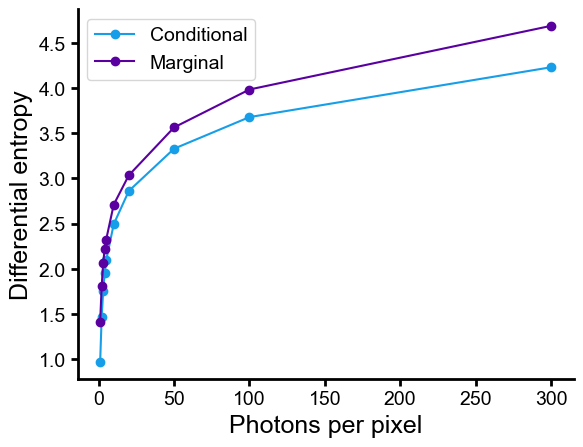

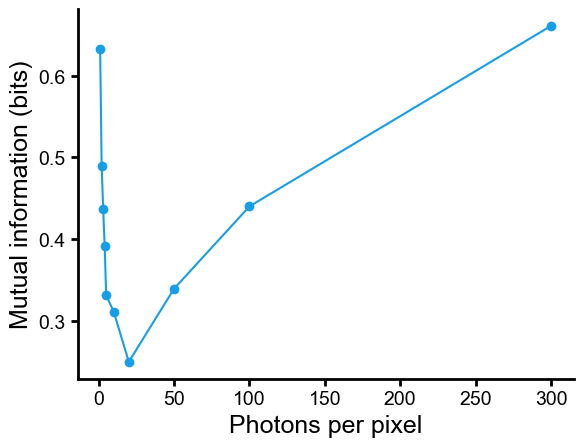

In [5]:
# plot both
fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, conditionals, '-o', label='Conditional')
ax.plot(photons_per_pixel_values, marginals, '-o', label='Marginal')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Differential entropy')
ax.legend()
clear_spines(ax)

fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
clear_spines(ax)

## Does generating the conditional entropy estimate from samples from the gaussian fit rescue it?
run the first two notebooks cells to prep for this

Text(0.5, 0.98, 'MI with conditional entropy estimated from model samples')

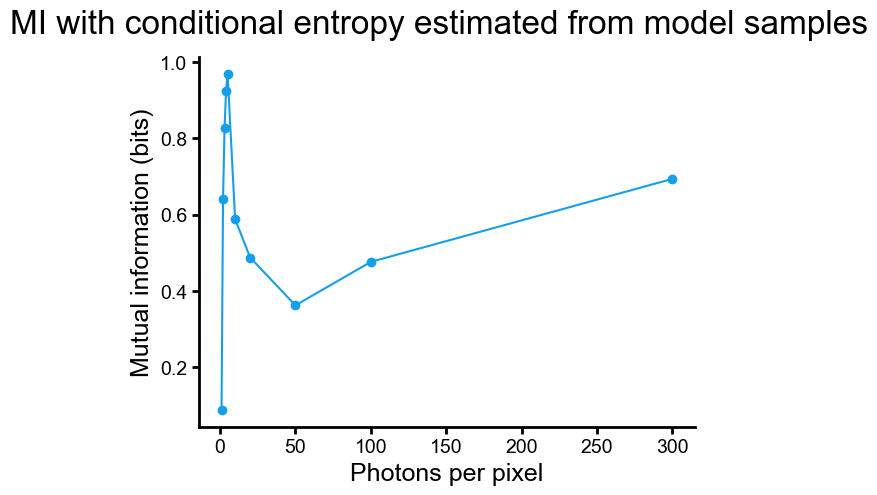

In [19]:
from encoding_information.information_estimation import *

# photons_per_pixel_values = [0.01, 0.1, 0.5, 1, 2, 4, 10, 50]
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
# photons_per_pixel_values = [10, 20, 50 , 100, 300]


mi = []
for photons_per_pixel in photons_per_pixel_values:
    noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images), seed=123)
    noisy_patches + onp.random.normal(size=noisy_patches.shape) 
    lower_photon_clean_images = patches * photons_per_pixel / np.mean(images)
    mi.append(estimate_mutual_information(noisy_patches, eigenvalue_floor=1e-3,
                                          clean_images=lower_photon_clean_images, estimate_conditional_from_model_samples=True,
                                verbose=True))


fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
clear_spines(ax)
fig.suptitle('MI with conditional entropy estimated from model samples')

## Does adding a bias offset help

Computing loss: 9it [00:02,  3.51it/s]


Initial validation NLL: 3.05


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.60s/it]
Computing loss: 9it [00:00, 63.74it/s]


Epoch 1: validation NLL: 3.06


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 17.72it/s]
Computing loss: 9it [00:00, 77.42it/s]


Epoch 2: validation NLL: 3.06


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]
Computing loss: 9it [00:00, 42.43it/s]


Epoch 3: validation NLL: 3.05


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]
Computing loss: 9it [00:00, 60.04it/s]


Epoch 4: validation NLL: 3.05


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 29.61it/s]
Computing loss: 9it [00:00, 61.17it/s]


Epoch 5: validation NLL: 3.05


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]
Computing loss: 9it [00:00, 68.59it/s]


Epoch 6: validation NLL: 3.05


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 27.09it/s]
Computing loss: 9it [00:00, 65.75it/s]


Epoch 7: validation NLL: 3.05


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 39.17it/s]
Computing loss: 9it [00:00, 56.87it/s]


Epoch 8: validation NLL: 3.05


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
Computing loss: 9it [00:00, 66.57it/s]


Epoch 9: validation NLL: 3.05


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 23.63it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 34.51it/s]
Computing loss: 9it [00:02,  3.84it/s].65s/it]


Initial validation NLL: 3.08


Epoch 1: 100%|██████████| 1/1 [00:09<00:00,  9.27s/it]
Computing loss: 9it [00:00, 51.87it/s]


Epoch 1: validation NLL: 3.08


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]
Computing loss: 9it [00:00, 56.85it/s]


Epoch 2: validation NLL: 3.08


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 23.67it/s]
Computing loss: 9it [00:00, 50.69it/s]


Epoch 3: validation NLL: 3.08


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]
Computing loss: 9it [00:00, 61.42it/s]


Epoch 4: validation NLL: 3.08


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]
Computing loss: 9it [00:00, 53.28it/s]


Epoch 5: validation NLL: 3.08


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
Computing loss: 9it [00:00, 40.48it/s]


Epoch 6: validation NLL: 3.09


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 47.11it/s]
Computing loss: 9it [00:00, 48.58it/s]


Epoch 7: validation NLL: 3.08


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]
Computing loss: 9it [00:00, 67.18it/s]


Epoch 8: validation NLL: 3.08


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 48.18it/s]
Computing loss: 9it [00:00, 67.94it/s]


Epoch 9: validation NLL: nan


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 36.09it/s]
Computing loss: 9it [00:00, 64.05it/s]


Epoch 10: validation NLL: nan


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 33.32it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 61.56it/s]
Computing loss: 9it [00:02,  3.70it/s].74s/it]


Initial validation NLL: 3.10


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]
Computing loss: 9it [00:00, 61.79it/s]


Epoch 1: validation NLL: 3.11


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]
Computing loss: 9it [00:00, 69.57it/s]


Epoch 2: validation NLL: 3.10


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 24.91it/s]
Computing loss: 9it [00:00, 51.93it/s]


Epoch 3: validation NLL: 3.11


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 25.32it/s]
Computing loss: 9it [00:00, 50.33it/s]


Epoch 4: validation NLL: 3.11


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 43.15it/s]
Computing loss: 9it [00:00, 18.66it/s]


Epoch 5: validation NLL: 3.11


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 23.24it/s]
Computing loss: 9it [00:00, 53.08it/s]


Epoch 6: validation NLL: 3.10


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 21.54it/s]
Computing loss: 9it [00:00, 51.05it/s]


Epoch 7: validation NLL: 3.11


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 44.61it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 59.26it/s]
Computing loss: 9it [00:02,  3.76it/s].00s/it]


Initial validation NLL: 3.12


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.03s/it]
Computing loss: 9it [00:00, 46.58it/s]


Epoch 1: validation NLL: 3.13


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 20.43it/s]
Computing loss: 9it [00:00, 64.46it/s]


Epoch 2: validation NLL: 3.12


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]
Computing loss: 9it [00:00, 71.32it/s]


Epoch 3: validation NLL: 3.12


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]
Computing loss: 9it [00:00, 50.35it/s]


Epoch 4: validation NLL: 3.12


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]
Computing loss: 9it [00:00, 62.53it/s]


Epoch 5: validation NLL: 3.12


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 48.98it/s]
Computing loss: 9it [00:00, 63.83it/s]


Epoch 6: validation NLL: 3.12


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 26.76it/s]
Computing loss: 9it [00:00, 54.56it/s]


Epoch 7: validation NLL: 3.12


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 30.22it/s]
Computing loss: 9it [00:00, 27.53it/s]


Epoch 8: validation NLL: 3.12


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 26.03it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 80.83it/s]
Computing loss: 9it [00:02,  3.81it/s].70s/it]


Initial validation NLL: 3.15


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.21s/it]
Computing loss: 9it [00:00, 57.18it/s]


Epoch 1: validation NLL: 3.14


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 23.88it/s]
Computing loss: 9it [00:00, 62.36it/s]


Epoch 2: validation NLL: 3.14


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 34.74it/s]
Computing loss: 9it [00:00, 46.05it/s]


Epoch 3: validation NLL: 3.14


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]
Computing loss: 9it [00:00, 62.79it/s]


Epoch 4: validation NLL: 3.14


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 20.84it/s]
Computing loss: 9it [00:00, 66.49it/s]


Epoch 5: validation NLL: 3.14


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]
Computing loss: 9it [00:00, 52.92it/s]


Epoch 6: validation NLL: 3.14


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 21.92it/s]
Computing loss: 9it [00:00, 44.63it/s]


Epoch 7: validation NLL: 3.15


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 42.10it/s]
Computing loss: 9it [00:00, 54.10it/s]


Epoch 8: validation NLL: 3.14


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 23.52it/s]
Computing loss: 9it [00:00, 33.94it/s]


Epoch 9: validation NLL: 3.14


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 39.39it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 56.77it/s]
Computing loss: 9it [00:02,  3.92it/s].49s/it]


Initial validation NLL: 3.25


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.53s/it]
Computing loss: 9it [00:00, 23.62it/s]


Epoch 1: validation NLL: 3.25


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
Computing loss: 9it [00:00, 64.79it/s]


Epoch 2: validation NLL: 3.25


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 26.88it/s]
Computing loss: 9it [00:00, 68.69it/s]


Epoch 3: validation NLL: 3.25


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 37.21it/s]
Computing loss: 9it [00:00, 63.85it/s]


Epoch 4: validation NLL: 3.25


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]
Computing loss: 9it [00:00, 58.89it/s]


Epoch 5: validation NLL: 3.26


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 33.93it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 23.91it/s]
Computing loss: 9it [00:02,  4.00it/s].06s/it]


Initial validation NLL: 3.43


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.54s/it]
Computing loss: 9it [00:00, 50.63it/s]


Epoch 1: validation NLL: 3.42


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 21.69it/s]
Computing loss: 9it [00:00, 55.07it/s]


Epoch 2: validation NLL: 3.42


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
Computing loss: 9it [00:00, 61.02it/s]


Epoch 3: validation NLL: 3.42


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.98it/s]
Computing loss: 9it [00:00, 55.20it/s]


Epoch 4: validation NLL: nan


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 25.95it/s]
Computing loss: 9it [00:00, 53.94it/s]


Epoch 5: validation NLL: nan


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
Computing loss: 9it [00:00, 56.37it/s]


Epoch 6: validation NLL: nan


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 44.99it/s]
Computing loss: 9it [00:00, 50.93it/s]


Epoch 7: validation NLL: nan


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 25.25it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 21.94it/s]
Computing loss: 9it [00:02,  3.67it/s].07s/it]


Initial validation NLL: 3.76


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.46s/it]
Computing loss: 9it [00:00, 39.68it/s]


Epoch 1: validation NLL: 3.76


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]
Computing loss: 9it [00:00, 68.06it/s]


Epoch 2: validation NLL: 3.76


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 24.48it/s]
Computing loss: 9it [00:00, 61.84it/s]


Epoch 3: validation NLL: 3.76


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.57it/s]
Computing loss: 9it [00:00, 61.96it/s]


Epoch 4: validation NLL: 3.76


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]
Computing loss: 9it [00:00, 62.64it/s]


Epoch 5: validation NLL: 3.76


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 34.05it/s]
Computing loss: 9it [00:00, 57.05it/s]


Epoch 6: validation NLL: 3.76


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 38.81it/s]
Computing loss: 9it [00:00, 78.21it/s]


Epoch 7: validation NLL: 3.75


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
Computing loss: 9it [00:00, 64.79it/s]


Epoch 8: validation NLL: 3.76


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 38.30it/s]
Computing loss: 9it [00:00, 58.88it/s]


Epoch 9: validation NLL: 3.76


Epoch 10: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
Computing loss: 9it [00:00, 64.21it/s]


Epoch 10: validation NLL: 3.76


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 29.95it/s]
Computing loss: 9it [00:00, 61.96it/s]


Epoch 11: validation NLL: 3.77


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 25.06it/s]
Computing loss: 9it [00:00, 41.27it/s]


Epoch 12: validation NLL: 3.76


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 26.76it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 25.53it/s]
Computing loss: 9it [00:02,  3.75it/s].68s/it]


Initial validation NLL: 4.09


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]
Computing loss: 9it [00:00, 102.30it/s]


Epoch 1: validation NLL: 4.10


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 44.51it/s]
Computing loss: 9it [00:00, 65.62it/s]


Epoch 2: validation NLL: 4.11


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
Computing loss: 9it [00:00, 62.15it/s]


Epoch 3: validation NLL: 4.10


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.92it/s]
Computing loss: 9it [00:00, 60.63it/s]


Epoch 4: validation NLL: 4.11


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]
Computing loss: 9it [00:00, 66.27it/s]


Epoch 5: validation NLL: 4.10


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 91.26it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 23.58it/s]
Computing loss: 9it [00:02,  3.71it/s].73s/it]


Initial validation NLL: 4.75


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.83s/it]
Computing loss: 9it [00:00, 51.86it/s]


Epoch 1: validation NLL: 4.75


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 21.65it/s]
Computing loss: 9it [00:00, 61.26it/s]


Epoch 2: validation NLL: 4.76


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
Computing loss: 9it [00:00, 29.32it/s]


Epoch 3: validation NLL: 4.75


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.08it/s]
Computing loss: 9it [00:00, 70.21it/s]


Epoch 4: validation NLL: 4.74


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
Computing loss: 9it [00:00, 64.00it/s]


Epoch 5: validation NLL: 4.74


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 23.56it/s]
Computing loss: 9it [00:00, 64.33it/s]


Epoch 6: validation NLL: 4.76


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 45.70it/s]
Computing loss: 9it [00:00, 37.47it/s]


Epoch 7: validation NLL: 4.76


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
Computing loss: 9it [00:00, 64.12it/s]


Epoch 8: validation NLL: 4.75


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 39.70it/s]
Computing loss: 9it [00:00, 63.20it/s]


Epoch 9: validation NLL: 4.75


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 26.75it/s]


evaluating likelihood


100%|██████████| 10/10 [05:56<00:00, 35.67s/it]


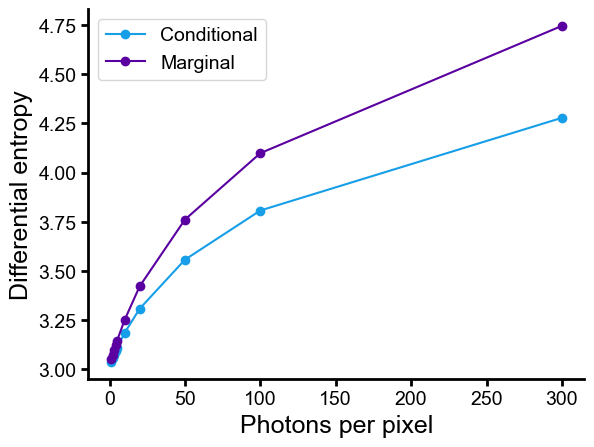

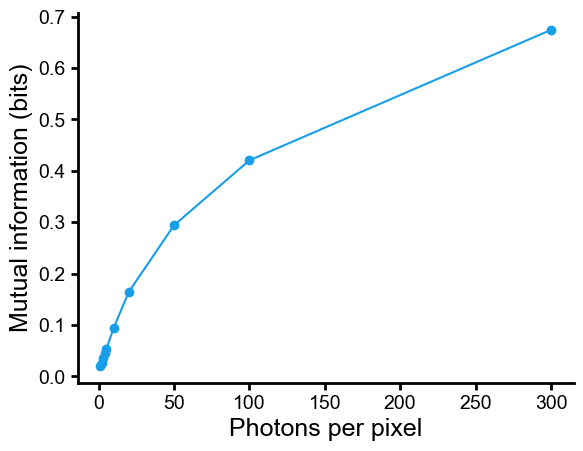

In [20]:
# photons_per_pixel_values = [0.01, 0.1, 0.5, 1, 2, 4, 10, 50]
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
# photons_per_pixel_values = [10, 20, 50 , 100, 300]
eigenvalue_floor = 1e-3

photon_bias = 25


conditionals = []
marginals = []
mi = []
for photons_per_pixel in tqdm(photons_per_pixel_values):
    noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images) + photon_bias, seed=123)
    noisy_test_patches = add_noise(test_patches * photons_per_pixel / np.mean(images) + photon_bias, seed=123)
    h_y_given_x = estimate_conditional_entropy(noisy_patches) 
    gp = StationaryGaussianProcess(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    gp.fit(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    h_y_gaussian = gp.compute_negative_log_likelihood(noisy_test_patches)
    conditionals.append(h_y_given_x)
    marginals.append(h_y_gaussian)
    mi.append( (h_y_gaussian - h_y_given_x) / np.log(2))


photons_per_pixel_values = np.array(photons_per_pixel_values) + photon_bias

# plot both
fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, conditionals, '-o', label='Conditional')
ax.plot(photons_per_pixel_values, marginals, '-o', label='Marginal')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Differential entropy')
ax.legend()
clear_spines(ax)

fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
clear_spines(ax)